In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import itertools


from mlxtend.frequent_patterns import apriori,association_rules



import warnings
warnings.filterwarnings('ignore')

In [2]:
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
data=movie.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
data[data.duplicated()]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0


In [6]:
data.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
count=data.iloc[:,:].sum().sort_values(ascending=False)
count

Gladiator        7
Sixth Sense      6
Patriot          6
LOTR1            2
Harry Potter1    2
LOTR2            2
Green Mile       2
Harry Potter2    1
LOTR             1
Braveheart       1
dtype: int64

In [8]:
data.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [9]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64
Gladiator
1    7
0    3
Name: Gladiator, dtype: int64
LOTR1
0    8
1    2
Name: LOTR1, dtype: int64
Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64
Patriot
1    6
0    4
Name: Patriot, dtype: int64
LOTR2
0    8
1    2
Name: LOTR2, dtype: int64
Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64
LOTR
0    9
1    1
Name: LOTR, dtype: int64
Braveheart
0    9
1    1
Name: Braveheart, dtype: int64
Green Mile
0    8
1    2
Name: Green Mile, dtype: int64


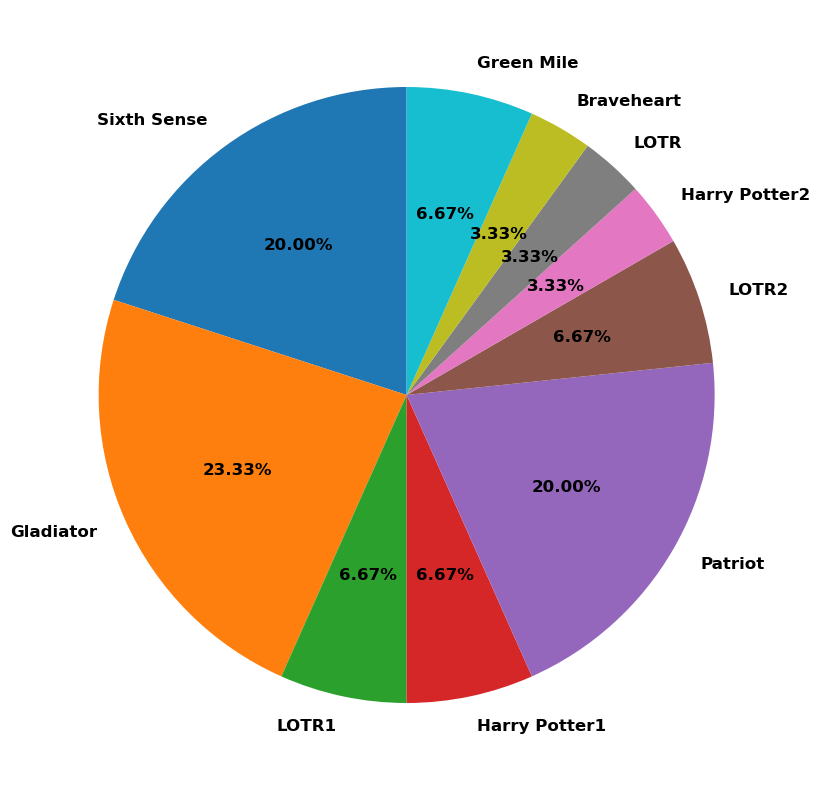

In [10]:
plt.figure(figsize=(15,10))

plt.pie(data.sum(),labels=data.columns,
        autopct='%.2f%%',
        startangle=90,
       textprops={'size':'large',
                 'color':'black',
                 'fontweight':'bold'})
plt.show()


In [11]:
count=count.to_frame().reset_index()
count=count.rename(columns={'index':'Items',0:'count'})
count

,Items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


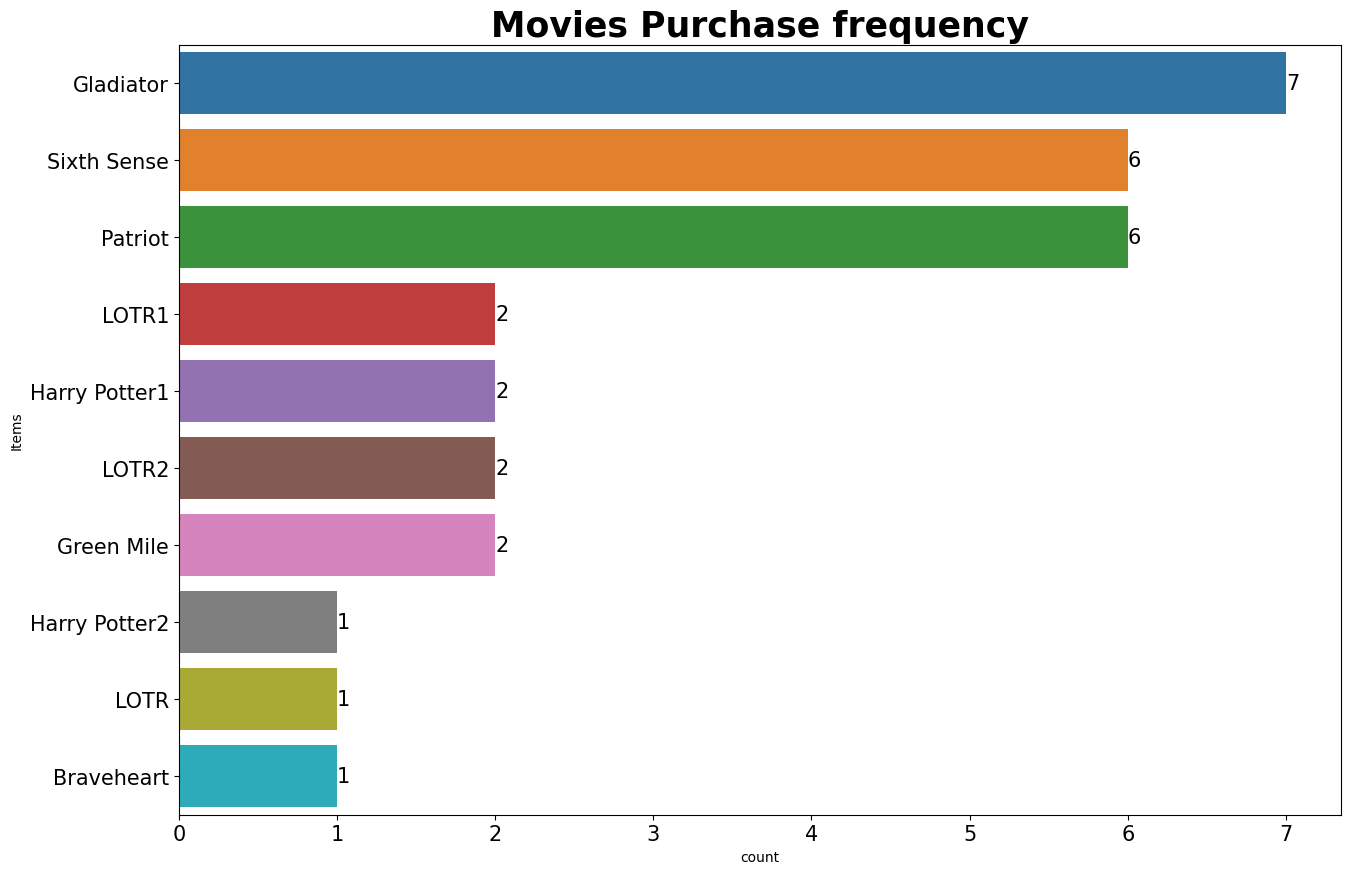

In [12]:
plt.figure(figsize=(15,10))

ax=sn.barplot(x='count',y='Items',data=count)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Movies Purchase frequency',fontsize=25,fontweight='bold')

for i in ax.containers:
    ax.bar_label(i,fontsize=15)

In [13]:
s1=pd.DataFrame(data.sum()/data.shape[0],columns=['Support']).sort_values('Support',ascending=False)
s1

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [14]:
s1[s1.Support>=0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [15]:
s1[s1.Support>=0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [16]:
s1[s1.Support>=0.2]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [17]:
s2= list(itertools.combinations(s1.index, 2))
s2 = [list(i) for i in s2]
s2[:10]

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [18]:
value=[]
for i in range(0,len(s2)):
    temp=data.T.loc[s2[i]].sum()
    temp = len(temp[temp == data.T.loc[s2[i]].shape[0]]) / data.shape[0]
    value.append(temp)

In [19]:
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in s2]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2
"(Harry Potter1, Harry Potter2)",0.1,2
"(LOTR1, Green Mile)",0.1,2
"(LOTR1, Harry Potter1)",0.1,2
"(Patriot, Braveheart)",0.1,2


In [20]:
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [21]:
s2=list(itertools.combinations(s1.index,3))
s2=[list(i) for i in s2]
s2[:10]

[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [22]:
value = []
for i in range(0, len(s2)):
    temp = data.T.loc[s2[i]].sum() 
    temp = len(temp[temp == data.T.loc[s2[i]].shape[0]]) / data.shape[0]
    value.append(temp)
              
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in s2]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


In [23]:
s2=list(itertools.combinations(s1.index, 4))
s2= [list(i) for i in s2]
s2[:10]

[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [24]:
value = []
for i in range(0, len(s2)):
    temp = data.T.loc[s2[i]].sum() 
    temp = len(temp[temp == data.T.loc[s2[i]].shape[0]]) / data.shape[0]
    value.append(temp)
      
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in s2]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


In [25]:
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [26]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR1),"(Harry Potter1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [27]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
126,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
181,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
168,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
116,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
118,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [28]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR1),"(Harry Potter1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


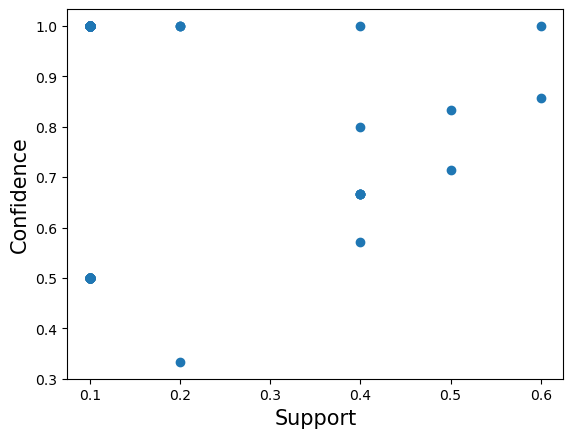

In [29]:
plt.scatter(rules['support'],rules['confidence'],)
plt.xlabel('Support',fontsize=15)
plt.ylabel('Confidence',fontsize=15)
plt.show()

In [30]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),"(Green Mile, LOTR1)","(Harry Potter1, Green Mile)","(Green Mile, LOTR2)",(LOTR1),"(Gladiator, Green Mile, Sixth Sense)","(Gladiator, LOTR, Sixth Sense)","(LOTR2, LOTR1, Sixth Sense)","(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1, Sixth Sense)",...,"(Harry Potter1, LOTR1, Sixth Sense)","(Gladiator, Patriot)","(LOTR1, Sixth Sense)","(Harry Potter1, Sixth Sense)","(LOTR2, Sixth Sense)","(Green Mile, Sixth Sense)","(LOTR, Sixth Sense)","(Gladiator, Green Mile)","(Gladiator, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1, Sixth Sense)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, Green Mile)",1.666667,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,2.5,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,5.0,NaN,5.0,2.5,NaN,NaN,5.0,NaN,5.0,...,NaN,NaN,5.0,NaN,5.0,2.5,NaN,NaN,NaN,NaN
"(Gladiator, LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, LOTR, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Heatmap for Lift Matrix')

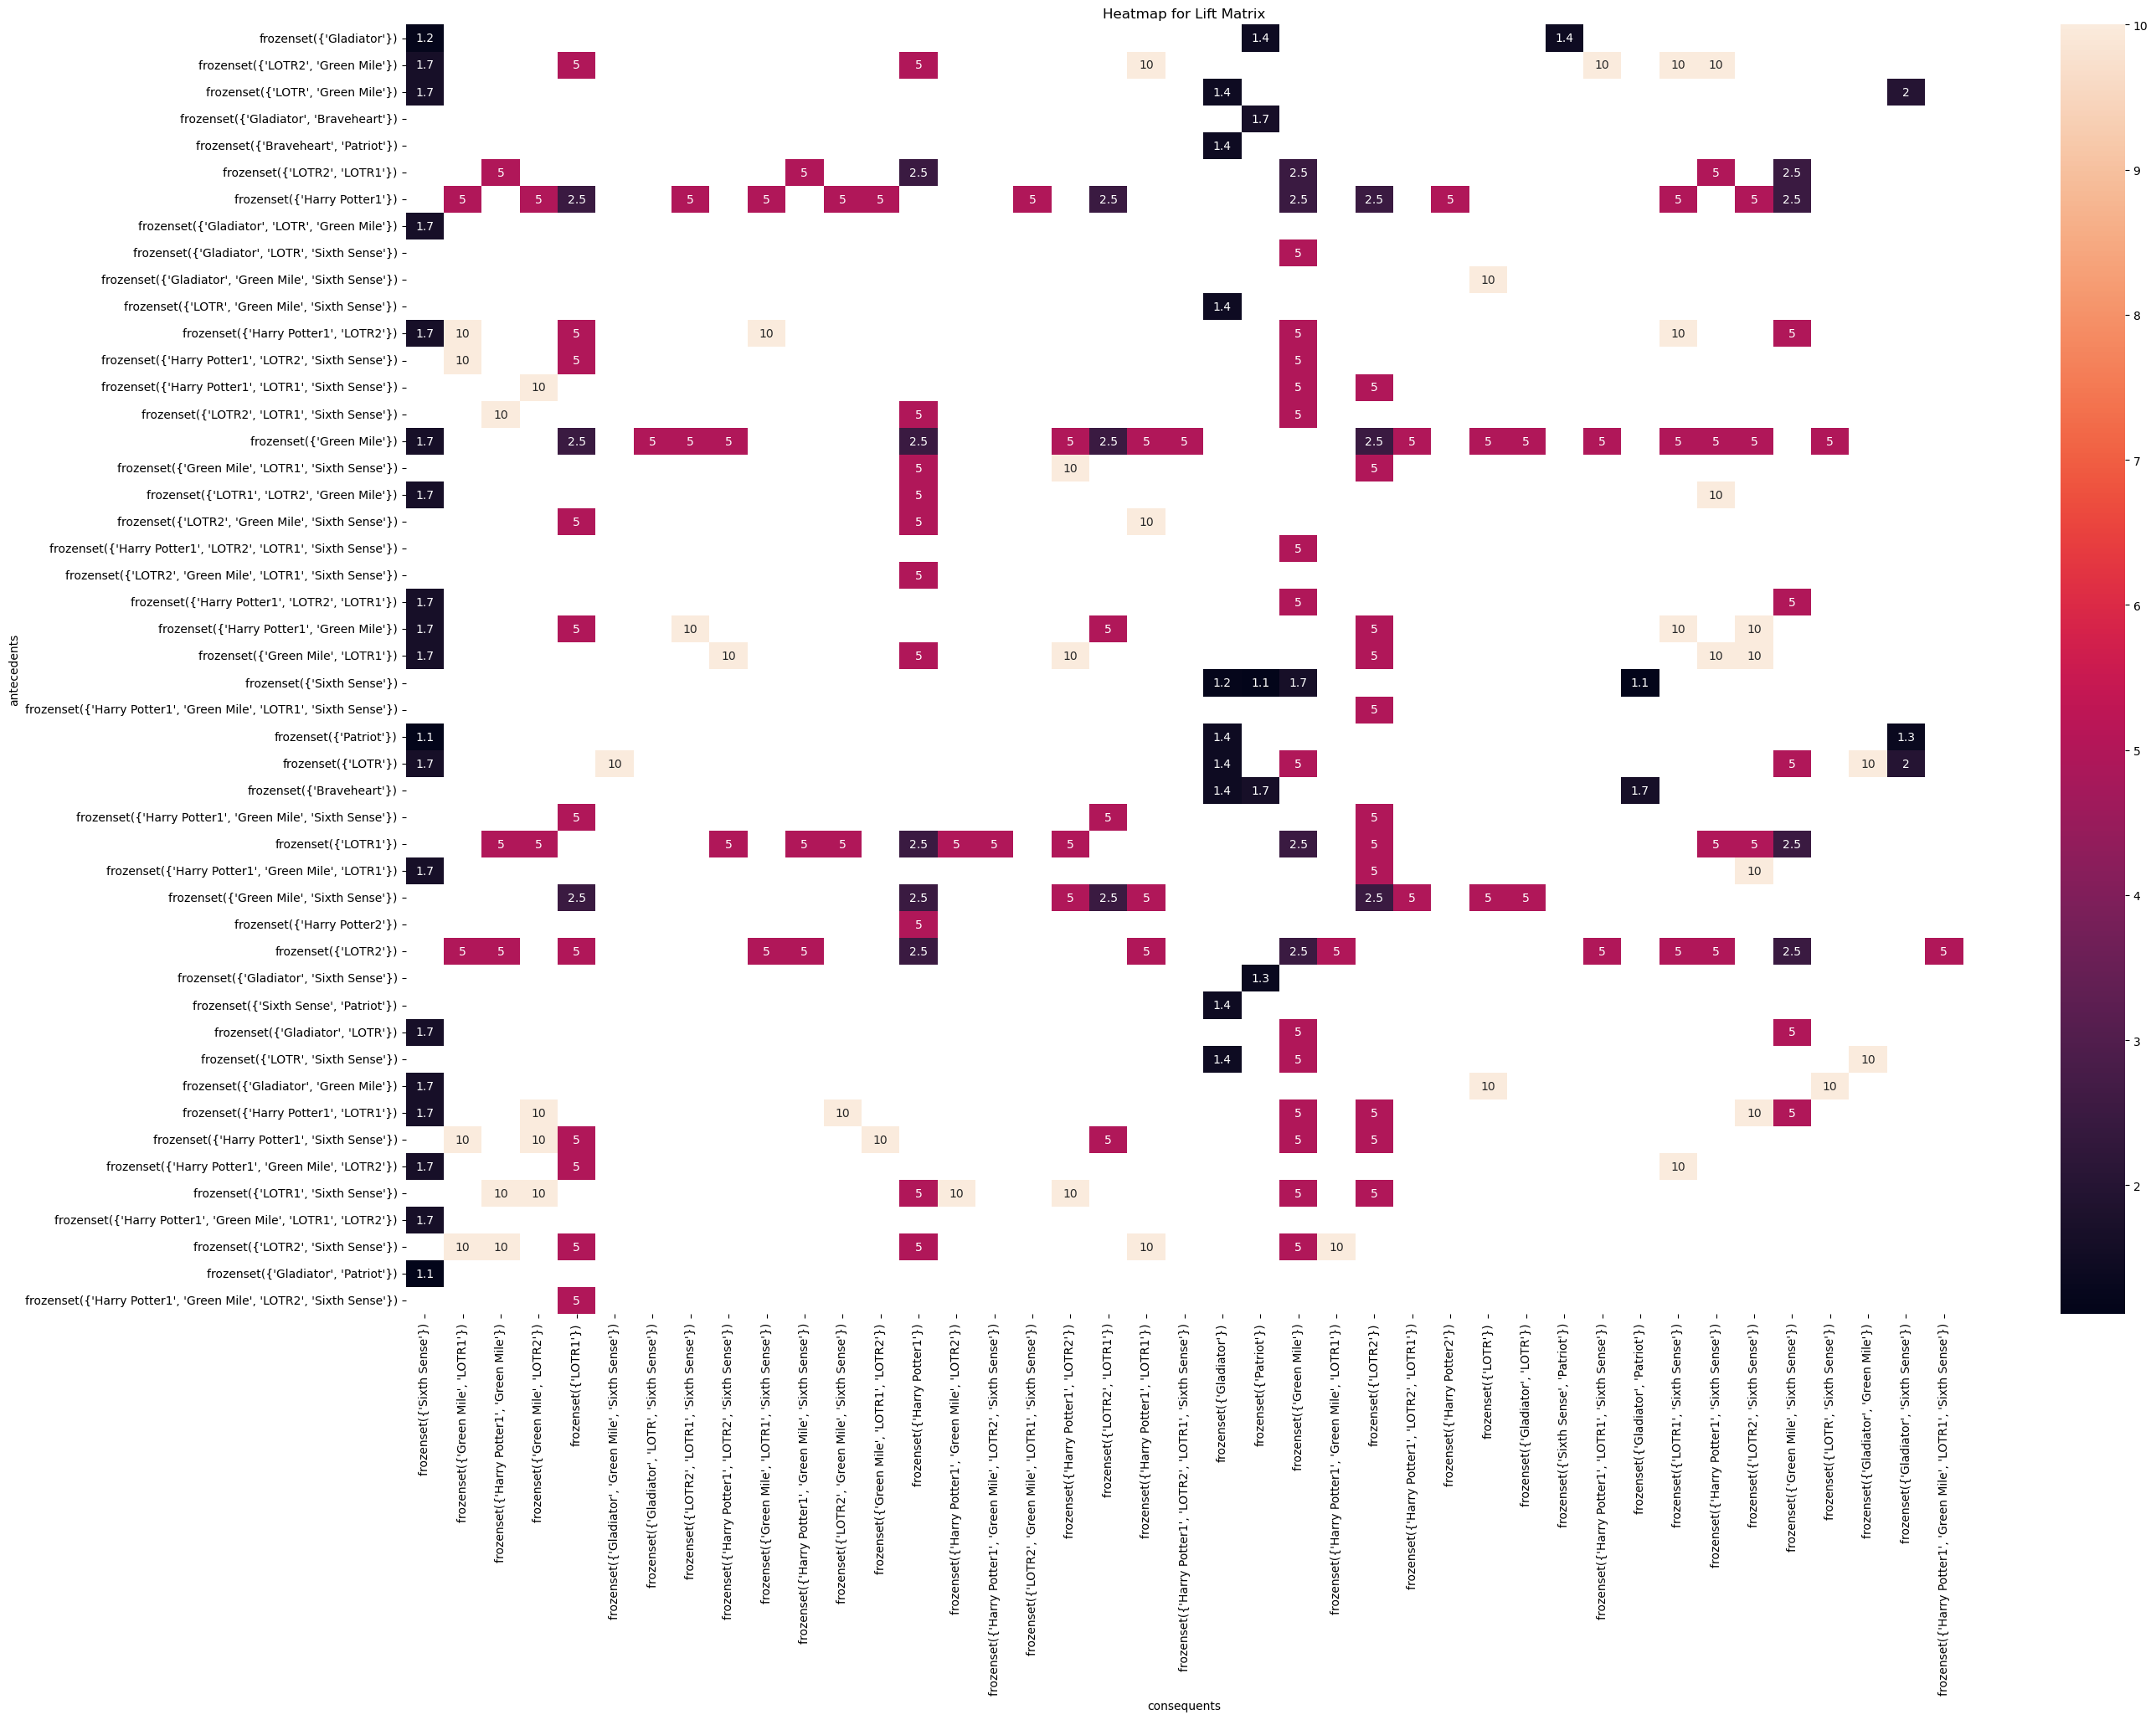

In [31]:
plt.figure(figsize=(30,20))
sn.heatmap(matrix,annot=True)
plt.title('Heatmap for Lift Matrix')

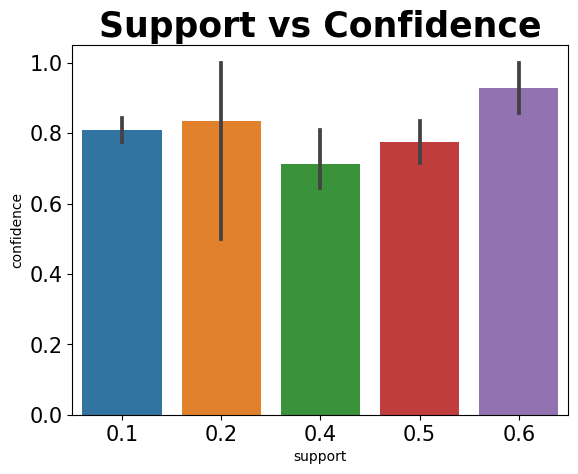

In [33]:
sn.barplot(x="support",y="confidence",data=lift)
plt.title("Support vs Confidence",fontsize=25,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

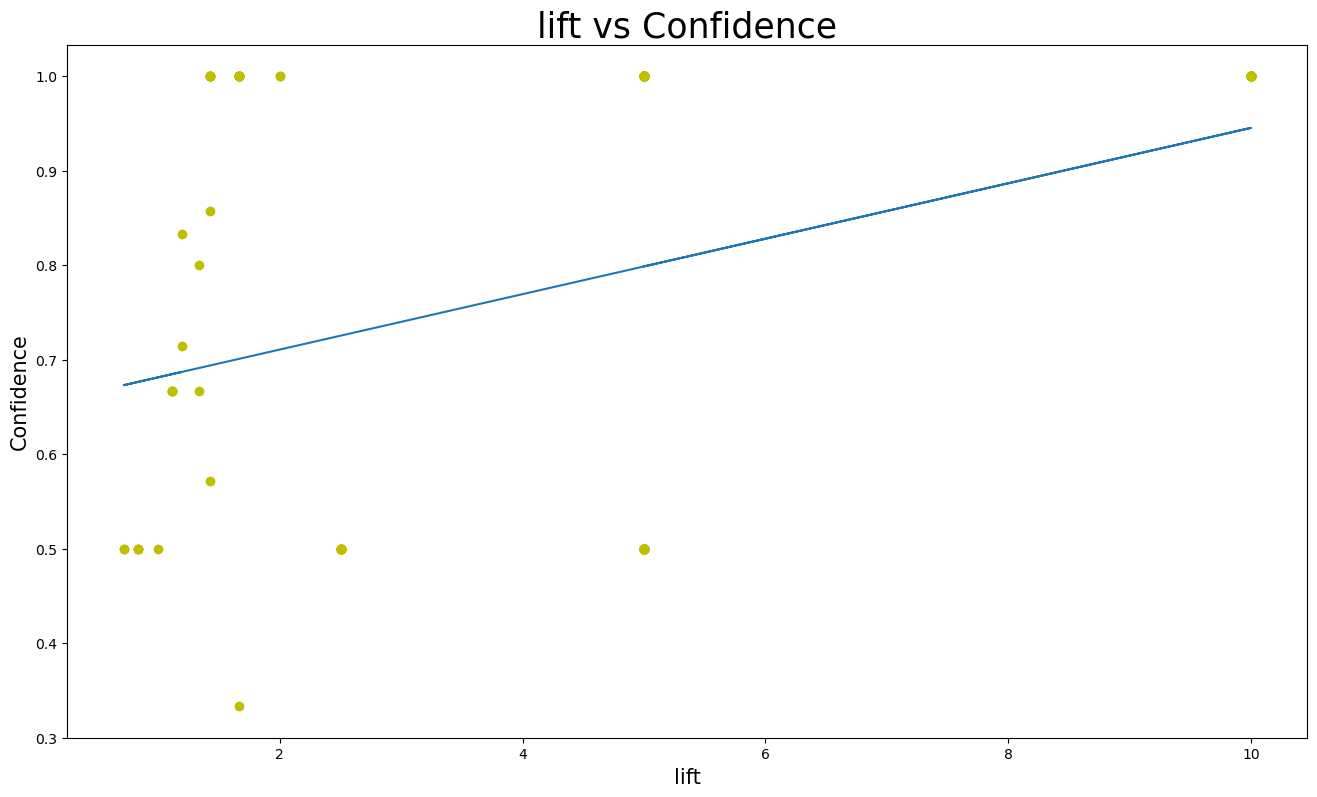

In [34]:
plt.figure(figsize=(16,9))

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)

plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))
plt.xlabel('lift',fontsize=15)
plt.ylabel('Confidence',fontsize=15)
plt.title('lift vs Confidence',fontsize=25)

In [35]:
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [36]:
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
12,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
13,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


In [37]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


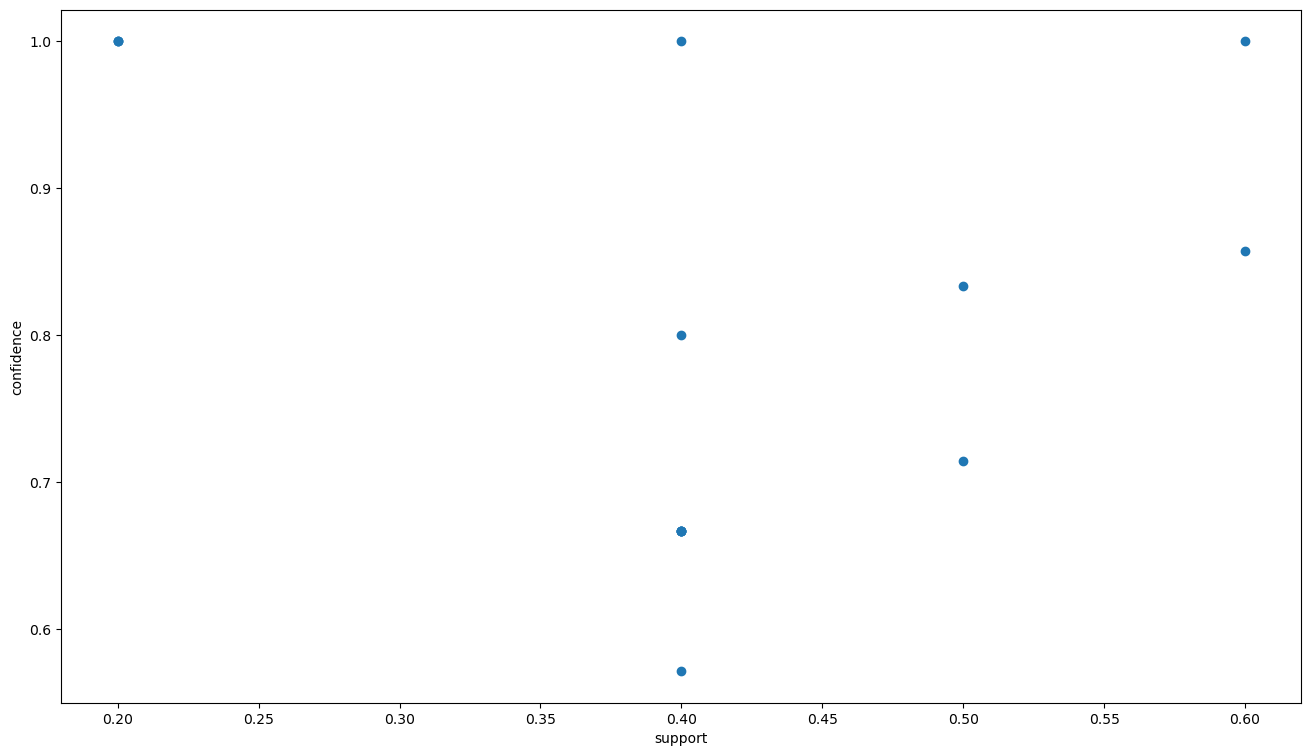

In [38]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


In [39]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),(Gladiator),(Patriot),(LOTR1),(LOTR2),"(Sixth Sense, Patriot)","(Gladiator, Sixth Sense)","(Gladiator, Patriot)"
antecedents,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,NaN,1.428571,NaN,NaN
(Sixth Sense),NaN,1.190476,1.111111,NaN,NaN,NaN,NaN,1.111111
(Patriot),1.111111,1.428571,NaN,NaN,NaN,NaN,1.333333,NaN
(Green Mile),1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN


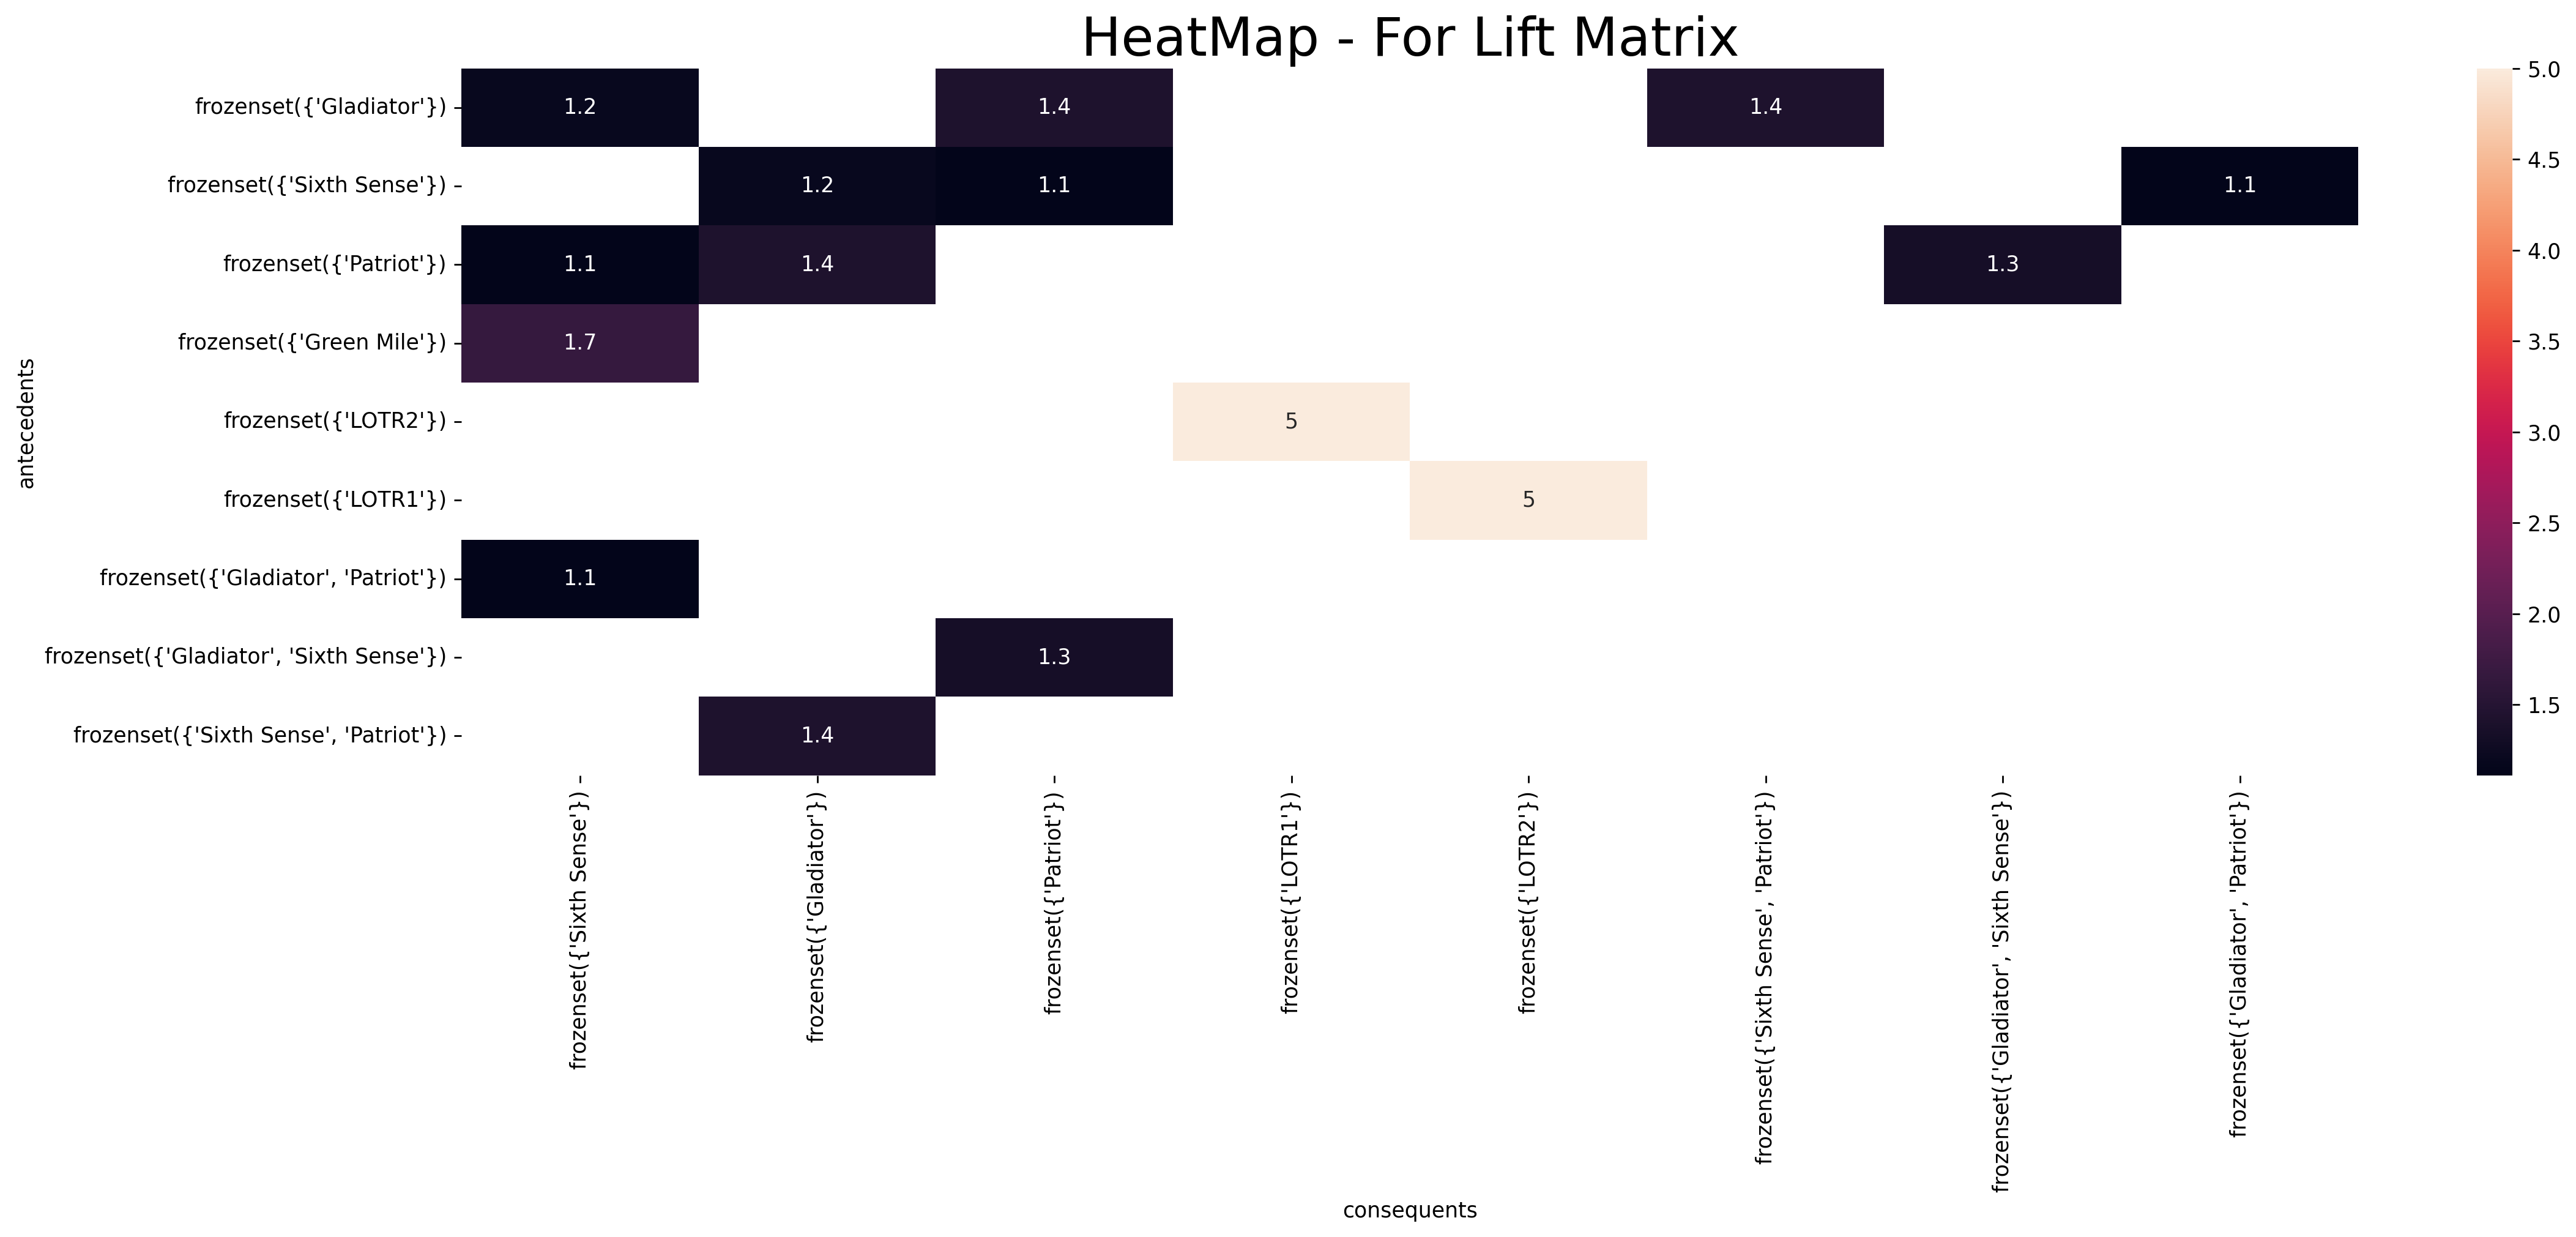

In [40]:
plt.figure(figsize=(20,6),dpi=250)
sn.heatmap(matrix,annot=True)
plt.title('HeatMap - For Lift Matrix',fontsize=25)
plt.show()


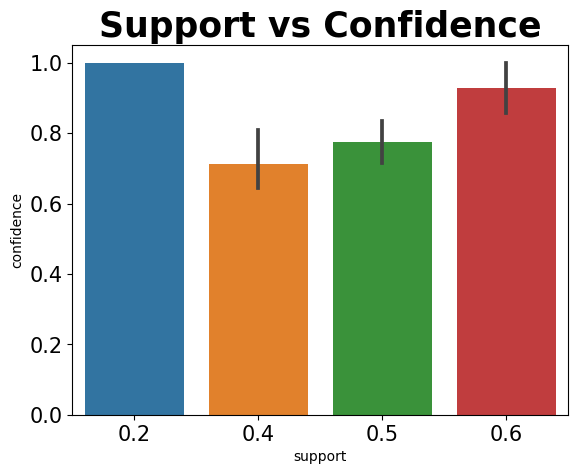

In [43]:
sn.barplot(x="support",y="confidence",data=lift)
plt.title("Support vs Confidence",fontsize=25,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

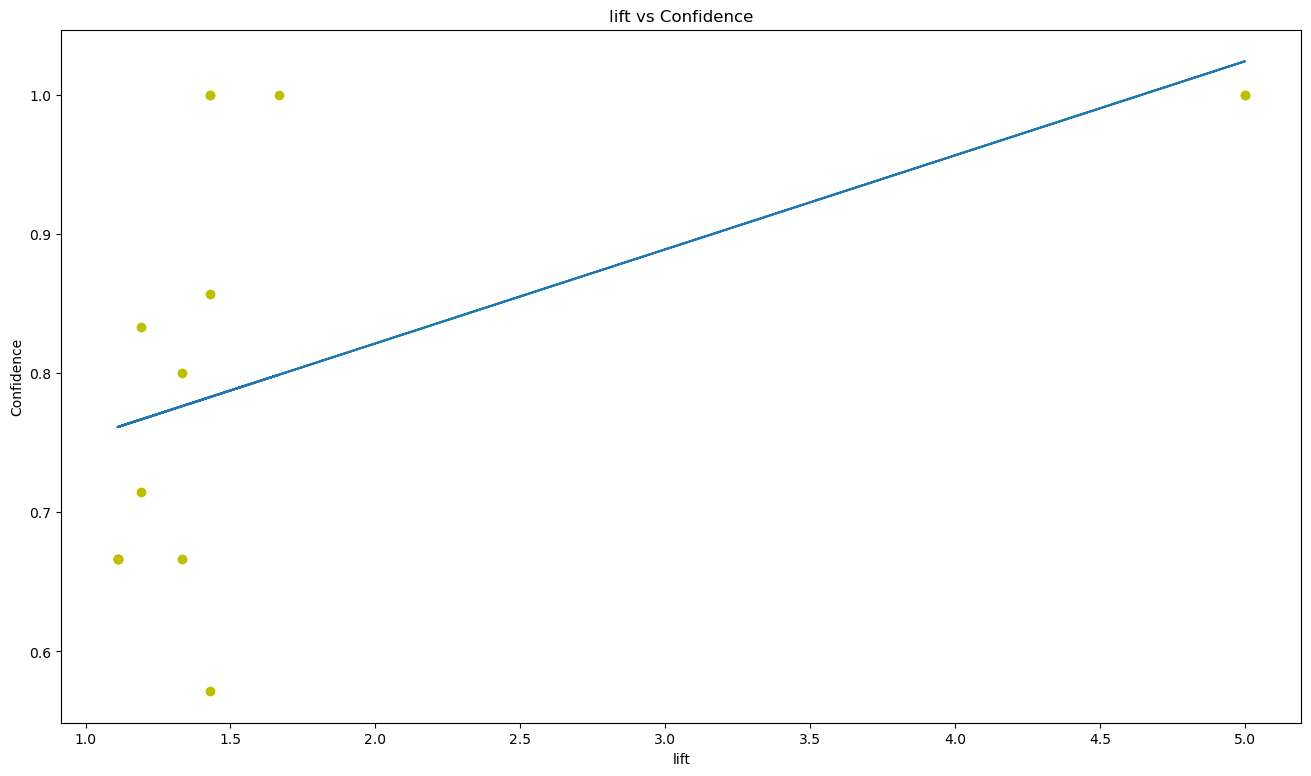

In [44]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')